<img src="https://i.ibb.co/w47BZhd/2-03.png" width=700>

# Библиотека для анализа данных Pandas


 



<img src="https://files.realpython.com/media/A-Guide-to-Pandas-Dataframes_Watermarked.7330c8fd51bb.jpg" alt="Drawing" style="width: 50px;" width="480"/>


## 1.1 Импортируем библиотеки

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

#магическая команда, указывает, что графики нужно строить прямо в ноутбуке: 
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1.2 Загрузим данные и посмотрим на них



In [ ]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [ ]:
data = pd.read_excel('data_ford_price.xlsx')

In [ ]:
data.shape

(7017, 12)

In [ ]:
data.head(5)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [ ]:
data.tail(3)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0
7016,18000,2010,2,8,104000,clean,automatic,4wd,full-size,37.987200,-84.178900,50.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


## 1.3. Посмотрим общую статистику по числовым данным



In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,7017.0,15121.549523,11765.423119,1.000000,5995.000000,12750.000000,21995.0000,2.995000e+05
year,7017.0,2007.869745,6.975329,1957.000000,2004.000000,2010.000000,2013.0000,2.018000e+03
condition,7017.0,2.598689,0.703662,0.000000,2.000000,3.000000,3.0000,5.000000e+00
cylinders,7017.0,7.374662,0.942928,3.000000,6.000000,8.000000,8.0000,1.000000e+01
odometer,7017.0,119978.670942,89922.155723,0.000000,73285.000000,118000.000000,157804.0000,2.490000e+06
lat,7017.0,39.550144,5.745409,-2.508807,35.661076,40.335245,43.5821,7.761768e+01
long,7017.0,-91.903404,14.030710,-151.055832,-95.937145,-88.168416,-82.7063,-5.377999e+00
weather,6837.0,52.142899,7.954830,29.000000,45.000000,51.000000,59.0000,7.100000e+01


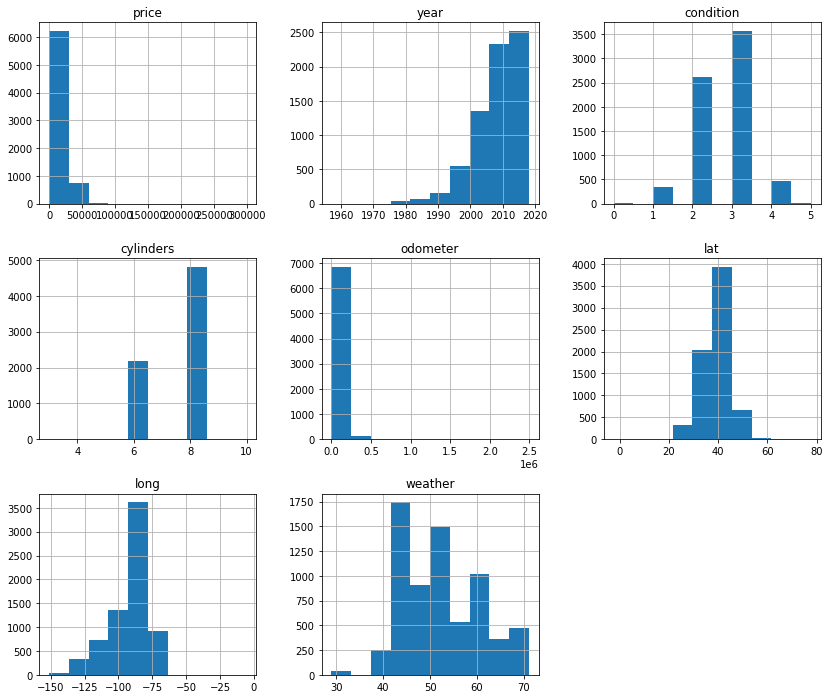

In [ ]:
data.hist(figsize=(14, 12));

 ## 1.4. Индексация и извлечение данных 

---


In [ ]:
data['condition']

0       4
1       2
2       2
3       1
4       3
       ..
7012    3
7013    2
7014    3
7015    2
7016    2
Name: condition, Length: 7017, dtype: int64

In [ ]:
data['condition'].value_counts()

3    3566
2    2613
4     472
1     338
5      17
0      11
Name: condition, dtype: int64

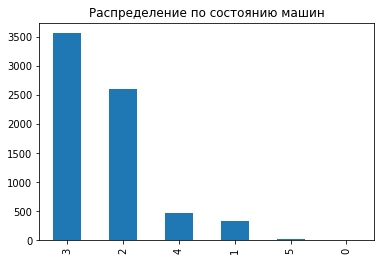

In [ ]:
data['condition'].value_counts().plot(kind='bar', )
plt.title('Распределение по состоянию машин');

In [ ]:
mask = data['condition'] == 3
data[mask]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
6,8995,2006,3,8,115500,clean,automatic,rwd,full-size,43.592223,-96.787488,38.0
7,5995,2005,3,6,191198,clean,automatic,rwd,full-size,38.611926,-121.423565,59.0
9,5500,2007,3,6,139913,clean,manual,rwd,full-size,31.782356,-96.088975,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7008,14995,2010,3,8,0,clean,automatic,NaN,full-size,32.788557,-117.098278,59.0
7009,24000,2015,3,6,135000,clean,automatic,4wd,full-size,36.783600,-90.216800,52.0
7010,62995,2017,3,6,22973,clean,automatic,4wd,full-size,34.244046,-77.860915,56.0
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0


In [ ]:
data[mask]['price'].max()

299500

In [ ]:
print(data[data['cylinders'] == 6]['year'].median(), data[data['cylinders'] == 8]['year'].median())

2013.0 2007.0


## 1.5 Группировка данных и визуальный анализ


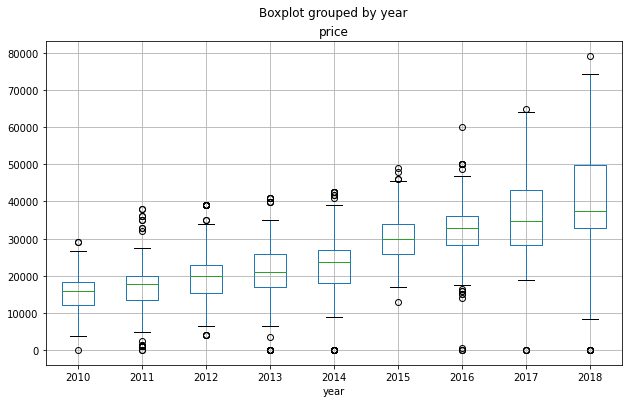

In [ ]:
data[data['year']>2009].boxplot(figsize=(10,6), column='price', by='year');

In [ ]:
mean_price_2000 = data[data['year']>=2000].groupby(by='year')['price'].mean()

mean_price_2000

year
2000     3712.311321
2001     4169.169082
2002     7821.887097
2003     5554.994350
2004     6758.830247
2005     7396.773913
2006     8022.709832
2007     9115.150442
2008    10610.943182
2009    13407.565217
2010    15379.444444
2011    17088.597701
2012    19726.964706
2013    21315.984043
2014    22960.569331
2015    29766.042714
2016    32479.148352
2017    36828.490385
2018    40892.843284
Name: price, dtype: float64

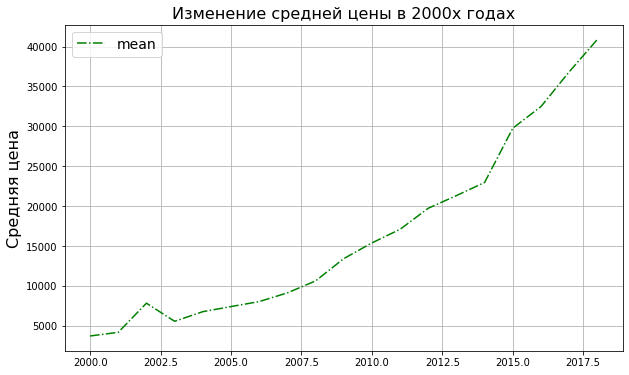

In [ ]:
# инициализируем фигуру и указываем ее размер
plt.figure(figsize=(10, 6))

# название графика
plt.title('Изменение средней цены в 2000х годах', fontsize=16)

# строим график
plt.plot(mean_price_2000, color='green', linestyle='-.', label='mean')

# настраиваем подписи осей
plt.ylabel('Средняя цена', fontsize=16)

# включаем легенду и сетку
plt.legend(fontsize=14)
plt.grid()

## 1.6 Заполним пропуски в данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [ ]:
data['drive'].value_counts()

4wd    4888
rwd    1653
fwd      85
Name: drive, dtype: int64

In [ ]:
data['size'].value_counts()

full-size      4570
mid-size        867
compact          15
sub-compact       1
Name: size, dtype: int64

In [ ]:
data['weather'].median()

51.0

In [ ]:
drive_filler = data['drive'].value_counts().index[0]
size_filler = data['size'].value_counts().index[0]
weather_filler = data['weather'].median()

Запрлним пропуски с помощью метода .fillna()

In [ ]:
data['drive'] = data['drive'].fillna(drive_filler)
data['size'] = data['size'].fillna(size_filler)
data['weather'] = data['weather'].fillna(weather_filler)

## 1.7 Предобработка текстовых данных

In [ ]:
data.info()

<img src='https://i.ibb.co/k8bkTCB/one-hot-encoding.jpg'>

In [ ]:
pd.get_dummies(data)

,price,year,condition,cylinders,odometer,lat,long,weather,title_status_clean,title_status_lien,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,13865,2010,3,8,166062,49.210949,-123.114720,51.0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,32.680700,-117.169800,59.0,1,0,...,1,0,0,0,0,1,0,1,0,0
7013,5975,2005,2,8,0,38.213303,-85.785762,50.0,1,0,...,1,0,0,0,0,1,0,1,0,0
7014,9999,2006,3,8,161514,37.609783,-120.995406,59.0,1,0,...,1,0,0,1,0,0,0,1,0,0
7015,10900,2011,2,8,164000,43.140600,-93.385000,47.0,1,0,...,1,0,0,1,0,0,0,1,0,0


---
# Обзор результатов семинара

На этом семинаре мы:
* познакомились с рабочей средой Colab для Data Sсience;
* на примере практической задачи поработали с основными библиотеками Pandas и Matplotlib;
* проделали шаг 1 пайплайна анализа данных, а именно загрузку и визуальный анализ данных.

Научились: 
* загружать библиотеки, необходимые для работы;
* загружать данные, представленные в формате таблицы;
* понимать, какой размер у выборки данных, какие типы имеют признаки;
* индексировать и группировать данные;
* смотреть различные статистики по данным;
* строить гистограммы и боксплоты.
